In [4]:
# Setup time.  Import libraries, and pick some good colors
# that are easy to discern and look good together.  Also
# set up some universal values for the plots we're going to
# generate - easier to set them once here than tinker with 
# them all individually...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

color1 = '#6359a6' # purple
color2 = '#bebada' # light purple
color3 = '#f94c39' # salmon
color4 = '#fca69c' # lightsalmon
color5 = '#8dd3c7' # teal
color6 = '#b8f5ea' # lightteal
color7 = '#fed9a6' # yellow
color8 = '#ffe8c9' # lightyellow

# *****TODO: I just figured out you can simplify this and/or make it more flexible/elegant using a cycler object.

colorlist=['#6359a6', '#f94c39', '#8dd3c7', '#fed9a6'] #just cycle thru colors
colorlist2alts=['#6359a6', '#bebada', '#f94c39', '#fca69c', '#8dd3c7', '#b8f5ea', '#fed9a6', '#ffe8c9'] #color, close relative, color 2, close relative, etc...
colorlist3alts=['#6359a6', '#837bbd', '#bebada', '#f94c39', '#ff8a7d', '#ffbab3', '#3bc4ad', '#7aebd8', '#b6fcf1', '#ffa11f', '#ffc16b', '#ffdcab'] #color, close relative, close relative, color 2, close relative, etc...

SMALL_SIZE = 14   # Defining font sizes
MEDIUM_SIZE = 22  # Defining font sizes
BIGGER_SIZE = 25  # Defining font sizes

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('legend', loc='upper left')

plt.rc('errorbar', capsize=0)            # size of caps on your error bars, in pixels (0=no caps)


In [43]:
# Google colab specific setup:  mount Google Drive for data ingest.
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Setup Block - much of this is self-explanatory, and will change as I keep working on this.


In [19]:
setup_path = "C:/Users/jacob.t.mangini/Documents/Jupyter/Data Analysis/" #@param {type:"string"}
setup_sheet = "20220809_multip20_repeat_mins_subtracted.xlsx" #@param {type:"string"}

In [45]:
# Run this if you need to clear things out - if you change the spreadsheet and it's not
# showing up in your results - try this before you reboot the entire kernel.
del df
del labellist
del pruned

NameError: name 'df' is not defined

In [20]:
# Open our spreadsheet:
# Currently, you need to make sure that there are no 
# datetime values in there - only general numbers.
# Otherwise subsequent manipulations will fail.
# I might get around to making it a bit more flexible in that 
# regard but for now make sure those time values are just
# general numbers - not date/time values.

# Also this is assuming that each column is topped with a 
# label describing the experimental condition.  This will
# also be important later because all identical labels will be
# grouped together for means and standard errors of means.

df = pd.read_excel(setup_path + setup_sheet, header=None)

# This will grab the top row and turn it into a list called "labellist"

newlabels=(df.iloc[:1,].values)
labellist=newlabels[0].tolist()

# delete that dataframe...
del df

# Now we're opening the same spreadsheet up again but this time
# it will have that label list attached to it, which will make life
# easier later on.

df = pd.read_excel(setup_path + setup_sheet, names=labellist, index_col=0)

# We're going to turn that label list into a dictionary, which will 
# get rid of duplicate entries - our next move will be to step through
# that pruned list ('pruned') and grab all matching columns to derive
# our means and sterrs from.

pruned = list(dict.fromkeys(labellist))
pruned.pop(0) # get 'mins' out of there.

avgs= []
errs= []
avgs.append(df.index.values)
errs.append(df.index.values)
for p in pruned:
# what's with the '.1' and '.2'?  pandas read-excel function despises
# identical column header labels - it will automagically append .1,
# .2, .3, etc to identical ones.  So here, we're telling it to include
# those 'tags' in our search so all the columns we're after wind up
# included in the means and sterrs.
    avgs.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9'],axis=1).mean(axis=1).values)
    errs.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9'],axis=1).sem(axis=1).values)

# spit out the pruned label list as quick sanity check
print(pruned)



['Different Tips', 'Same Tips', 'Every Two', 'Old Mix', 'T7 Mix']


In [21]:
# Turn those lists into numpy arrays...
npavg=np.asarray(avgs)
nperr=np.asarray(errs)

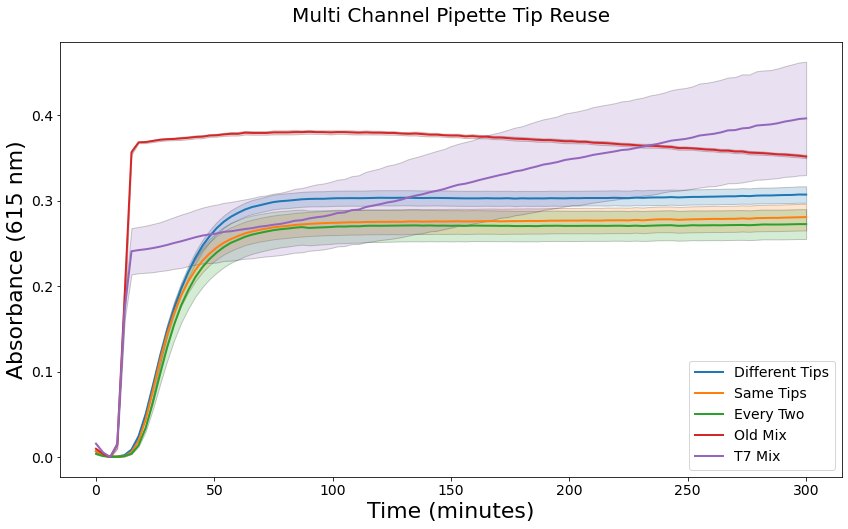

In [27]:
# Now let's make a basic plot.  Set it up, then step through the pruned
#  "experiment list" again, this time grabbing the relevant entries from
# each numpy array to construct a plot from.
# This way the same code can run on an arbitrarily sized spreadsheet. 

fig, ax = plt.subplots(figsize=(14,8))
n=1
for p in pruned:
    ax.errorbar(npavg[0], npavg[n], label=p, linewidth=2)
    plt.fill_between(npavg[0],npavg[n]-nperr[n], npavg[n]+nperr[n], alpha=0.2, edgecolor='000000')
    n=n+1
    
plottitle = "Multi Channel Pipette Tip Reuse"
plt.xlabel('Time (minutes)')
plt.ylabel('Absorbance (615 nm)')
plt.title(plottitle, fontsize=20, pad=20)
plt.legend(loc='lower right')



# And for good measure, let's have it spit out a png file...

# plt.savefig("/content/drive/MyDrive/Colab Data/test01.png", dpi=300)

initial signal:  -0.01961808811025947
initial slope:  -0.007746847819143223
final signal:  0.2995916513218938
final slope:  1.9517134433904255e-05
transition slope:  238.0249315828621
transition midpoint:  21.282742618889852


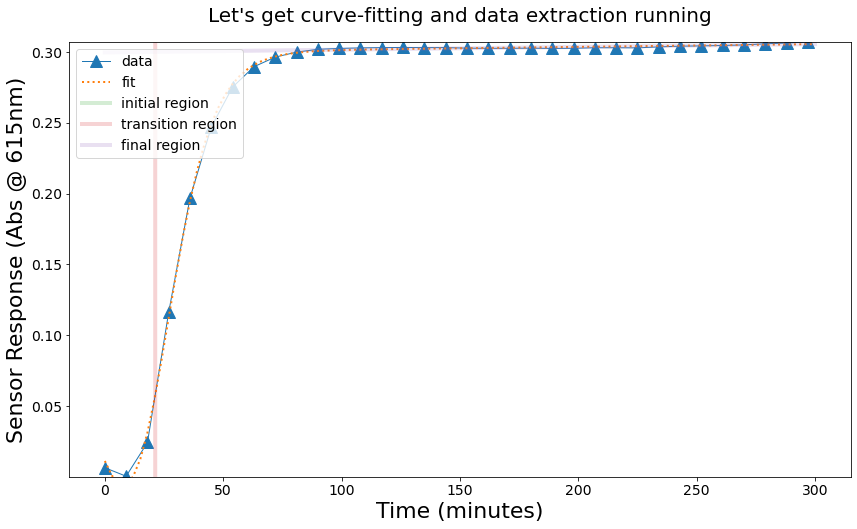

In [24]:
# setup the plot
fig, ax = plt.subplots(figsize=(14,8))

# define our function - this is the 6-component fit that should give us info we want.
def func(x, initialsignal, initialslope, finalsignal, finalslope, transitionslope, transitionmidpoint):
  observedsignal = ((initialsignal+(initialslope*x))+(finalsignal+(finalslope*x))*np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))/(1+np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))
  return observedsignal


# define utility functions that will plot 'diagnostic' lines for us separately describing
# the initial, transition, and final regions that we've fit.

def simplelinear(x, m1, b1):
  return (m1*x)+b1

# do the curve fit, with some initial guesses for the fit parameters.
# *********** CODE NEEDED HERE ***************
# this is an area that could use some work - I'm thinking that looking
# at the first 40 and last 40 data points and doing a simple linear 
# fit to determine the slope and intercept might really help bootstrap
# this fit so it doesn't wind up failing on weird plots.  with sane
# values for four of the components, the slope and midpoint of the
# transition regions should be easy to find without manual intervention.

pfit, pcov = curve_fit(func, npavg[0], npavg[1], p0=[1,0,166,0,300,40])

# barf out fit results.  this is also a handy reference to what's what.

print("initial signal: ",pfit[0])
print("initial slope: ",pfit[1])
print("final signal: ",pfit[2])
print("final slope: ",pfit[3])
print("transition slope: ",pfit[4])
print("transition midpoint: ",pfit[5])

# with the fit values now established, calcuate the y-intercept of the
# transition-region line so that we can plot it separately later.

midint = -(pfit[4] * pfit[5] - func(pfit[5],*pfit))

# set the limits of the plot to the max and min values of the data in the array
# this is because otherwise it will try to get the whole transition line on the 
# plot and that one usually has a bananas y-intercept.

plt.ylim(np.amin(npavg[1]),np.amax(npavg[1]))

# plot the source data

skipafewx=np.asarray(npavg[0])
skipafewy=np.asarray(npavg[1])

plt.plot(skipafewx[::3], skipafewy[::3], lw=1, marker='^', markersize=12, label='data')

# plot the fit

plt.plot(npavg[0], func(npavg[0], *pfit), lw=2, ls=":", label='fit')

# throw up three more lines, one for the initial baseline, 
# one for the transition region, one for the final baseline

plt.plot(npavg[0], simplelinear(npavg[0], pfit[1], pfit[0]), lw=4, alpha=0.2, label='initial region')
plt.plot(npavg[0], simplelinear(npavg[0], pfit[4], midint), lw=4, alpha=0.2, label='transition region')
plt.plot(npavg[0], simplelinear(npavg[0], pfit[3], pfit[2]), lw=4, alpha=0.2, label='final region')
    
# finish marking up the plot
plottitle = "Let's get curve-fitting and data extraction running"
plt.xlabel('Time (minutes)')
plt.ylabel('Sensor Response (Abs @ 615nm)')
plt.title(plottitle, fontsize=20, pad=20)
plt.legend(loc='upper left')

# And for good measure, let's have it spit out a png file...
# savepath = setup_path + "optional-output.png"
# plt.savefig(savepath, dpi=300)
